# Create data

In [2]:
import random
import torch
from torch import nn, optim
import math
from IPython import display

from plot_lib import plot_data, plot_model, set_default
import matplotlib.pyplot as plt

In [3]:
set_default()

In [4]:
device = torch.device('cuda:0')

In [5]:
seed = 1
random.seed(seed)
torch.manual_seed(seed)

N = 1000 # num samples per class
D = 1    # dimensions
C = 1    # num outputs
H = 100  # num hidden units

In [6]:
X = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1).to(device)
y = X.pow(3) + 0.3 * torch.rand(X.size()).to(device)

In [7]:
print('Shapes:')
print('X:', tuple(X.size()))
print('y:', tuple(y.size()))

Shapes:
X: (100, 1)
y: (100, 1)


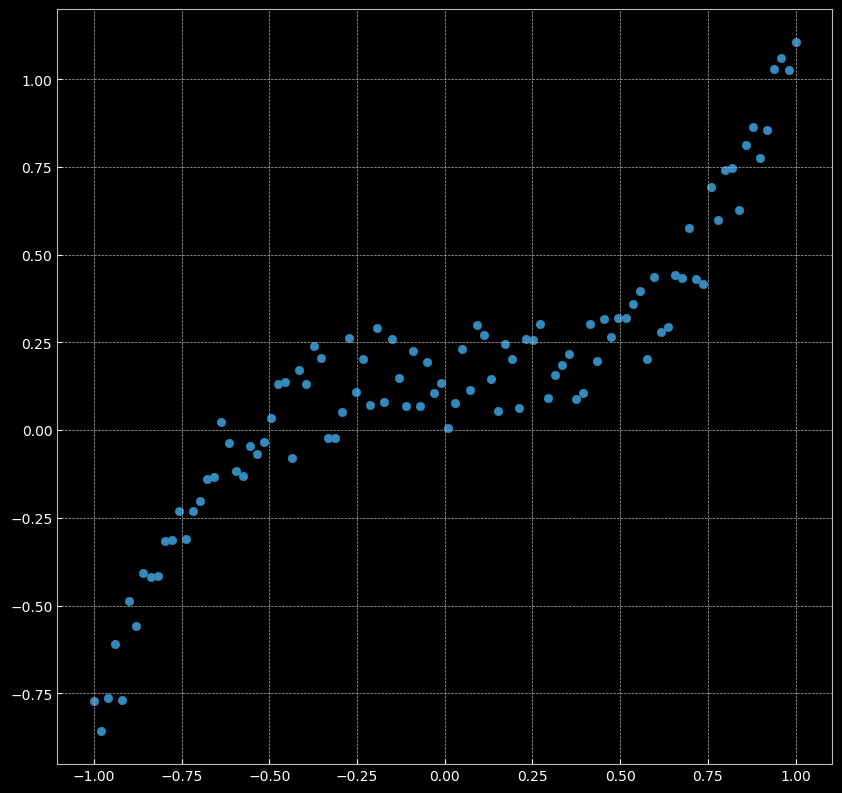

In [8]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy())
plt.axis('equal');

# Linear model

In [9]:
learning_rate = 1e-3
lambda_l2 = 1e-5

In [11]:
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C)
)
model.to(device)

criterion = lambda *z: torch.sqrt(torch.nn.MSELoss()(*z))

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)

# training
for t in range(1000):
    
    # forward
    y_pred = model(X)
    
    # loss
    loss = criterion(y_pred, y)
    print(f'[Epoch]: {t:d}, [Loss (rmse)]: {loss:.5f}')
    display.clear_output(wait=True)
    
    # backwards
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

[Epoch]: 999, [Loss (rmse)]: 0.17234


In [12]:
print(model)

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=1, bias=True)
)


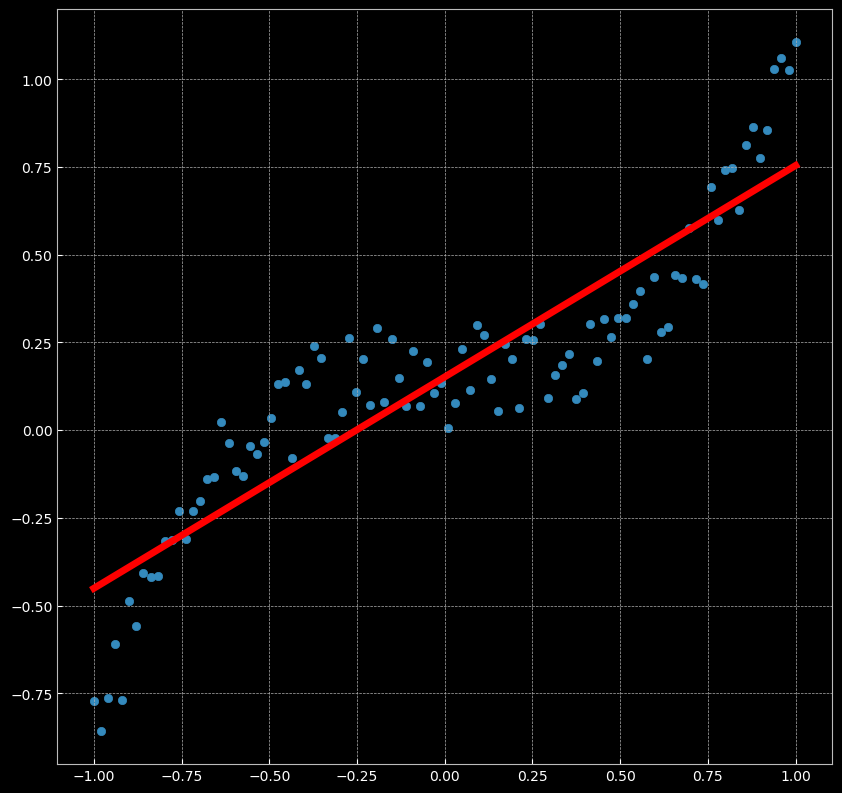

In [14]:
plt.scatter(X.data.cpu().numpy(), y.data.cpu().numpy())
plt.plot(X.data.cpu().numpy(), y_pred.data.cpu().numpy(), 'r-', lw=5)
plt.axis('equal');

# Two-layered network with ReLU

In [30]:
learning_rate = 1e-2

In [31]:
model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, C)
)
model.to(device)

criterion = lambda *z: torch.sqrt(torch.nn.MSELoss()(*z))

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)

# training
for t in range(1000):
    
    # forward
    y_pred = model(X)
    
    # loss
    loss = criterion(y_pred, y)
    print(f'[Epoch]: {t:d}, [Loss (rmse)]: {loss:.5f}')
    display.clear_output(wait=True)
    
    # backwards
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

[Epoch]: 999, [Loss (rmse)]: 0.08703


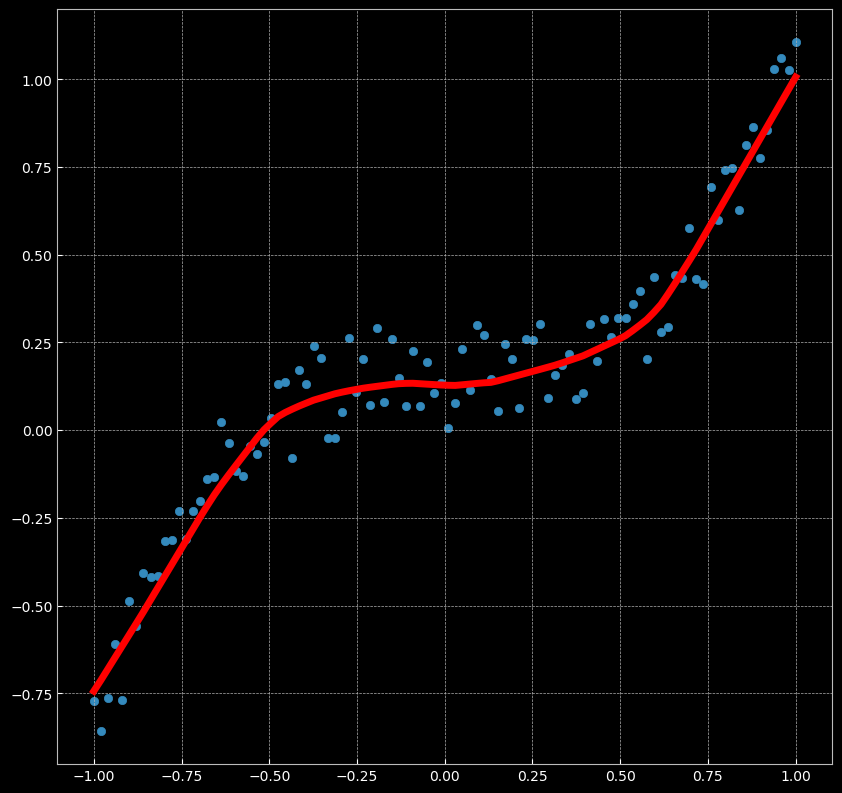

In [32]:
plt.scatter(X.data.cpu().numpy(), y.data.cpu().numpy())
plt.plot(X.data.cpu().numpy(), y_pred.data.cpu().numpy(), 'r-', lw=5)
plt.axis('equal');